In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

In [24]:
# Read data from files
raw_df = pd.read_csv("EMG_data_for_gestures-master/01/1_raw_data_13-12_22.03.16.txt", sep='\t')

In [32]:
"""
0 - unmarked data,
1 - hand at rest, 
2 - hand clenched in a fist, 
3 - wrist flexion,
4 – wrist extension,
5 – radial deviations,
6 - ulnar deviations,
7 - extended palm (the gesture was not performed by all subjects).
"""
# Removing unmarked data
marked_df = raw_df[raw_df['class'] != 0]
# Get class list
class_list = marked_df['class'].tolist()

# Get data list of lists
data_list = marked_df.drop(columns=['time', 'class'], axis=1).values.tolist()

In [37]:
# Split testing and training data
data_train, data_test, class_train, class_test = train_test_split(data_list, class_list, test_size=0.75, random_state=0)

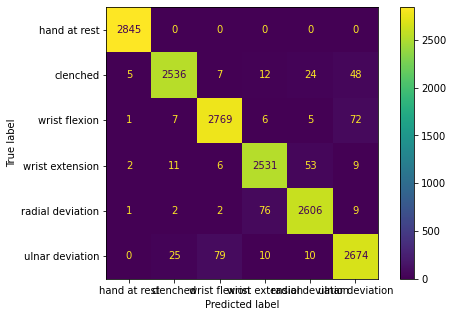

In [38]:

# Train with extra trees classifier
model = ExtraTreesClassifier()
model.fit(data_train, class_train)
# Test model
class_prediction = model.predict(data_test)
# Check results
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(class_test, class_prediction),
    display_labels=["hand at rest", "clenched", "wrist flexion", "wrist extension", "radial deviation", "ulnar deviation"],
)

cmp.plot(ax=ax)
plt.show()

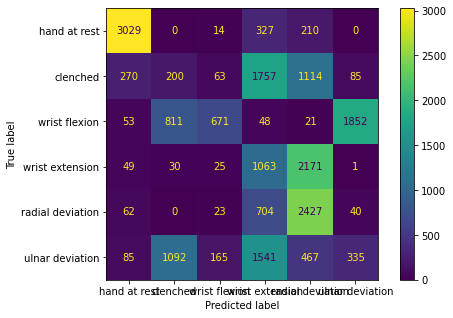

In [41]:
# test on other user
raw_df2 = pd.read_csv("EMG_data_for_gestures-master/02/1_raw_data_14-19_22.03.16.txt", sep='\t')

# Removing unmarked data
marked_df2 = raw_df2[raw_df2['class'] != 0]
# Get class list
class_list2 = marked_df2['class'].tolist()

# Get data list of lists
data_list2 = marked_df2.drop(columns=['time', 'class'], axis=1).values.tolist()

# Check model tested on other user
class_prediction2 = model.predict(data_list2)

# Check results
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(class_list2, class_prediction2),
    display_labels=["hand at rest", "clenched", "wrist flexion", "wrist extension", "radial deviation", "ulnar deviation"],
)

cmp.plot(ax=ax)
plt.show()